# Data Cleaning with Pandas

In [1]:
import pandas as pd

## Scenario

As data scientists, we want to build a model to predict the sale price of a house in Seattle in 2019, based on its square footage. We know that the King County Department of Assessments has comprehensive data available on real property sales in the Seattle area. We need to prepare the data.

### First, get the data!

When working on a project involving data that can fit on our computer, we store it in a `data` directory.

```bash
cd <project_directory>  # example: cd ~/flatiron_ds/pandas-3
mkdir data
cd data
```

Note that `<project_directory>` in angle brackets is a _placeholder_. You should type the path to the actual location on your computer where you're working on this project. Do not literally type `<project_directory>` and _do not type the angle brackets_. You can see an example in the _comment_ to the right of the command above.

Now, we'll need to download the two data files that we need. We can do this at the command line:

```bash
wget https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
wget https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
```

*Note:* If you do not have the `wget` command yet, you can install it: `brew install wget`.

Note that `%20` in a URL translates into a space. Even though you will *never put spaces in filenames*, you may need to deal with spaces that _other_ people have used in filenames.

There are two ways to handle the spaces in these filenames when referencing them at the command line.

#### 1. You can _escape_ the spaces by putting a backslash (`\`, remember _backslash is next to backspace_) before each one:

`unzip Real\ Property\ Sales.zip`

This is what happens if you tab-complete the filename in the terminal. Tab completion is your friend!

#### 2. You can put the entire filename in quotes:

`unzip "Real Property Sales.zip"`

Try unzipping these files with the `unzip` command. The `unzip` command takes one argument, the name of the tile that you want to unzip.


You can use tab completion (press the `tab` key after the first three letters) to fill in the names, including spaces. This will 

In [47]:
!cd data

In [48]:
sales_df = pd.read_csv('data/EXTR_RPSale.csv')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Seeing pink? Warnings are useful!

Note the warning above: `DtypeWarning: Columns (1, 2) have mixed types.` Because we start with an index of zero, the columns that we're being warned about are actually the _second_ and _third_ columns, `sales_df['Major']` and `sales_df['Minor']`.

In [49]:
sales_df.head().T

,0,1,2,3,4
ExciseTaxNbr,2687551,1235111,2704079,2584094,1056831
Major,138860,664885,423943,403700,951120
Minor,110,40,50,715,900
DocumentDate,08/21/2014,07/09/1991,10/11/2014,01/04/2013,04/20/1989
SalePrice,245000,0,0,0,85000
RecordingNbr,20140828001436,199203161090,20141205000558,20130110000910,198904260448
Volume,,071,,,117
Page,,001,,,053
PlatNbr,,664885,,,951120
PlatType,,C,,,P


### Data overload?

That's a lot of columns. We're only interested in identifying the date, sale price, and square footage of each specific property. What can we do?

In [50]:
sales_df = sales_df[['Major', 'Minor', 'DocumentDate', 'SalePrice']]

In [51]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014336 entries, 0 to 2014335
Data columns (total 4 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(1), object(3)
memory usage: 61.5+ MB


In [52]:
bldg_df = pd.read_csv('data/Residential Building.zip')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Another warning! Which column has index 11?

In [53]:
bldg_df.columns[11]

'ZipCode'

`ZipCode` seems like a potentially useful column. We'll need it to determine which house sales took place in Seattle.

In [54]:
bldg_df.head().T

,0,1,2,3,4
Major,4300,4610,4610,4610,4900
Minor,167,399,503,505,56
BldgNbr,1,1,1,1,1
NbrLivingUnits,1,1,1,1,1
Address,15223 40TH AVE S 98188,4431 FERNCROFT RD 98040,4516 FERNCROFT RD 98040,4538 FERNCROFT RD 98040,3015 SW 105TH ST 98146
BuildingNumber,15223,4431,4516,4538,3015
Fraction,,,,,
DirectionPrefix,,,,,SW
StreetName,40TH,FERNCROFT,FERNCROFT,FERNCROFT,105TH
StreetType,AVE,RD,RD,RD,ST


### So many features!

As data scientists, we should be _very_ cautious about discarding potentially useful data. But, today, we're interested in _only_ the total square footage of each property. What can we do?


In [55]:
bldg_df = bldg_df[['Major', 'Minor', 'SqFtTotLiving', 'ZipCode']]

In [56]:
bldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511412 entries, 0 to 511411
Data columns (total 4 columns):
Major            511412 non-null int64
Minor            511412 non-null int64
SqFtTotLiving    511412 non-null int64
ZipCode          468372 non-null object
dtypes: int64(3), object(1)
memory usage: 15.6+ MB


In [57]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

### Error!

Why are we seeing an error when we try to join the dataframes?

<table>
    <tr>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013160 entries, 0 to 2013159
Data columns (total 4 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(1), object(3)
memory usage: 61.4+ MB</pre></td>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511359 entries, 0 to 511358
Data columns (total 4 columns):
Major            511359 non-null int64
Minor            511359 non-null int64
SqFtTotLiving    511359 non-null int64
ZipCode          468345 non-null object
dtypes: int64(3), object(1)
memory usage: 15.6+ MB
</pre></td>
    </tr>
</table>

Review the error message in light of the above:

* `ValueError: You are trying to merge on object and int64 columns.`

In [84]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'])

### Error!

Note the useful error message above:

`ValueError: Unable to parse string "      " at position 936643`

In this case, we want to treat non-numeric values as missing values. Let's see if there's a way to change how the `pd.to_numeric` function handles errors.

In [85]:
# The single question mark means "show me the docstring"
pd.to_numeric?

Here's the part that we're looking for:
```
errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception
    - If 'coerce', then invalid parsing will be set as NaN
    - If 'ignore', then invalid parsing will return the input
```

Let's try setting the `errors` parameter to `'coerce'`.

In [60]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'], errors='coerce')

Did it work?

In [86]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014336 entries, 0 to 2014335
Data columns (total 4 columns):
Major           float64
Minor           float64
DocumentDate    object
SalePrice       int64
dtypes: float64(2), int64(1), object(1)
memory usage: 61.5+ MB


It worked! Let's do the same thing with the `Minor` parcel number.

In [87]:
sales_df['Minor'] = pd.to_numeric(sales_df['Minor'], errors='coerce')

In [88]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014336 entries, 0 to 2014335
Data columns (total 4 columns):
Major           float64
Minor           float64
DocumentDate    object
SalePrice       int64
dtypes: float64(2), int64(1), object(1)
memory usage: 61.5+ MB


Now, let's try our join again.

In [197]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

In [198]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
3,138860.0,110.0,06/08/2005,0,1490,98002
4,423943.0,50.0,10/11/2014,0,960,98092


In [199]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437522 entries, 0 to 1437521
Data columns (total 6 columns):
Major            1437522 non-null float64
Minor            1437522 non-null float64
DocumentDate     1437522 non-null object
SalePrice        1437522 non-null int64
SqFtTotLiving    1437522 non-null int64
ZipCode          1322148 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 76.8+ MB


We can see right away that we're missing zip codes for many of the sales transactions. (1321536 non-null entries for ZipCode is fewer than the 1436772 entries in the dataframe.) 

In [200]:
sales_data.loc[sales_data['ZipCode'].isna()].head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
99,858140.0,376.0,05/22/2012,0,900,NaN
100,858140.0,376.0,11/28/2017,0,900,NaN
152,720319.0,520.0,11/20/2013,699950,2840,NaN
153,720319.0,520.0,09/16/2013,0,2840,NaN
163,894677.0,240.0,12/21/2016,818161,2450,NaN


Because we are interested in finding houses in Seattle zip codes, we will need to drop the rows with missing zip codes.

In [201]:
sales_data = sales_data.loc[~sales_data['ZipCode'].isna(), :]

sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
3,138860.0,110.0,06/08/2005,0,1490,98002
4,423943.0,50.0,10/11/2014,0,960,98092


In [202]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322148 entries, 0 to 1437521
Data columns (total 6 columns):
Major            1322148 non-null float64
Minor            1322148 non-null float64
DocumentDate     1322148 non-null object
SalePrice        1322148 non-null int64
SqFtTotLiving    1322148 non-null int64
ZipCode          1322148 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 70.6+ MB


# Your turn: Data Cleaning with Pandas

### 1. Investigate and drop rows with invalid values in the SalePrice and SqFtTotLiving columns.

Use multiple notebook cells to accomplish this! Press `[esc]` then `B` to create a new cell below the current cell. Press `[return]` to start typing in the new cell.

In [203]:
sales_data['SalePrice'].head()

0    245000
1    109300
2     14684
3         0
4         0
Name: SalePrice, dtype: int64

In [204]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322148 entries, 0 to 1437521
Data columns (total 6 columns):
Major            1322148 non-null float64
Minor            1322148 non-null float64
DocumentDate     1322148 non-null object
SalePrice        1322148 non-null int64
SqFtTotLiving    1322148 non-null int64
ZipCode          1322148 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 70.6+ MB


...so there are values of `SalePrice` for every row. But we don't want `0` values because they are likely to be property transfers, not actual sales.
   

In [205]:
sales_data_2 = sales_data[ sales_data['SalePrice'] >= 100 ]

In [206]:
sales_data_2.describe()

,Major,Minor,SalePrice,SqFtTotLiving
count,866898.000000,866898.000000,8.668980e+05,866898.000000
mean,452356.329143,1491.844787,4.311366e+05,2103.653755
std,286352.574377,2770.647355,8.847897e+05,949.018427
min,40.000000,1.000000,1.000000e+02,0.000000
25%,206260.000000,115.000000,1.650000e+05,1450.000000
50%,388580.000000,320.000000,2.750000e+05,1940.000000
75%,723750.000000,960.000000,4.500000e+05,2560.000000
max,990600.000000,9689.000000,3.000000e+07,48160.000000


In [207]:
sales_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866898 entries, 0 to 1437520
Data columns (total 6 columns):
Major            866898 non-null float64
Minor            866898 non-null float64
DocumentDate     866898 non-null object
SalePrice        866898 non-null int64
SqFtTotLiving    866898 non-null int64
ZipCode          866898 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 46.3+ MB


It's a little arbitrary, but I'll leave the 100 min for now. If I wanted to be a bit more thorough might look at it by year, i.e. what is a 'reasonable' min price at the oldest sale date?

But also noticed that `SqFtTotLiving` also has a min of `0`. I think this is not in keeping with the process we are trying to indentify so will screen those out..maybe >10.

In [208]:
sales_data_2 = sales_data_2[ sales_data_2['SqFtTotLiving'] >= 10 ]

In [209]:
sales_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866883 entries, 0 to 1437520
Data columns (total 6 columns):
Major            866883 non-null float64
Minor            866883 non-null float64
DocumentDate     866883 non-null object
SalePrice        866883 non-null int64
SqFtTotLiving    866883 non-null int64
ZipCode          866883 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 46.3+ MB


In [210]:
sales_data_2.describe()

,Major,Minor,SalePrice,SqFtTotLiving
count,866883.000000,866883.000000,8.668830e+05,866883.000000
mean,452354.495556,1491.864801,4.311360e+05,2103.690142
std,286351.129433,2770.667018,8.847950e+05,948.986324
min,40.000000,1.000000,1.000000e+02,70.000000
25%,206260.000000,115.000000,1.650000e+05,1450.000000
50%,388580.000000,320.000000,2.750000e+05,1940.000000
75%,723750.000000,960.000000,4.500000e+05,2560.000000
max,990600.000000,9689.000000,3.000000e+07,48160.000000


Pass this new work back to `sales_data`

In [211]:
sales_data = sales_data_2

### 2. Investigate and handle non-numeric ZipCode values

Can you find a way to shorten ZIP+4 codes to the first five digits?

What's the right thing to do with missing values?

In [212]:
# Read the error message and decide how to fix it.
# Note: using errors='coerce' is the *wrong* choice in this case.
def is_integer(x):
    try:
        _ = int(x)
        #x == int(x)
    except ValueError:
        return False
    return True

sales_data.loc[sales_data['ZipCode'].apply(is_integer) == False, 'ZipCode'].head(5)



10168    98042-3001
10169    98042-3001
10170    98042-3001
10171    98042-3001
16528    98199-3014
Name: ZipCode, dtype: object

Truncate the zip at 5 characters

In [351]:
#sales_data = sales_data_2
sales_data['ZipCode'] = sales_data['ZipCode'].apply(lambda x : str(x)[:5])
sales_data['ZipCode'].head()

0    98002
1    98002
2    98002
6    98092
7    98092
Name: ZipCode, dtype: object

In [245]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866883 entries, 0 to 1437520
Data columns (total 6 columns):
Major            866883 non-null float64
Minor            866883 non-null float64
DocumentDate     866883 non-null object
SalePrice        866883 non-null int64
SqFtTotLiving    866883 non-null int64
ZipCode          866883 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 46.3+ MB


In [246]:
sales_data['ZipCode'].tail(10)

1437510    98028
1437511    98108
1437512    98177
1437513    98155
1437514    98022
1437515    98008
1437516    98116
1437517    98059
1437519    98077
1437520    98027
Name: ZipCode, dtype: object

Blargh, I don't think I want `NaN` zips, so I will clean them out.

In [247]:
sales_data = sales_data.loc[ ~sales_data['ZipCode'].isna(), : ]
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
6,423943.0,50.0,07/15/1999,96000,960,98092
7,423943.0,50.0,01/08/2001,127500,960,98092


In [248]:
sales_data.tail(10)

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
1437510,11410.0,629.0,01/26/1998,171000,730,98028
1437511,568000.0,570.0,01/09/2013,400000,2120,98108
1437512,944230.0,10.0,10/01/2001,280000,2530,98177
1437513,797990.0,510.0,09/27/1985,62000,1730,98155
1437514,42007.0,9047.0,03/09/1988,86000,1990,98022
1437515,386510.0,80.0,09/22/2003,559950,2780,98008
1437516,782870.0,70.0,09/09/1985,78000,1400,98116
1437517,947794.0,320.0,02/22/2002,331681,3010,98059
1437519,721470.0,820.0,04/15/2005,484950,2620,98077
1437520,235430.0,782.0,06/01/1984,85000,1500,98027


In [249]:
sales_data.head(10)

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
6,423943.0,50.0,07/15/1999,96000,960,98092
7,423943.0,50.0,01/08/2001,127500,960,98092
11,403700.0,715.0,07/03/2013,464500,1780,98008
12,403700.0,715.0,02/21/2013,357000,1780,98008
13,403700.0,715.0,10/13/1995,142000,1780,98008
14,403700.0,715.0,02/22/2007,528000,1780,98008
16,98400.0,380.0,03/23/1994,139950,2050,98058


In [250]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866883 entries, 0 to 1437520
Data columns (total 6 columns):
Major            866883 non-null float64
Minor            866883 non-null float64
DocumentDate     866883 non-null object
SalePrice        866883 non-null int64
SqFtTotLiving    866883 non-null int64
ZipCode          866883 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 46.3+ MB


I'm curious about the distribution of these zips:

In [353]:
sales_data['ZipCode'].value_counts().head(20)

98042    28129
98023    24409
98038    23513
98115    23492
98052    21824
98034    21547
98006    21179
98058    20600
98103    19883
98117    19850
98118    19287
98074    18252
98133    17503
98033    17397
98001    17020
98155    16701
98059    16678
98031    16362
98092    15862
98056    15603
Name: ZipCode, dtype: int64

In [355]:
sales_data['ZipCode'].value_counts().tail(20)

98189    3
98021    2
98111    2
98063    2
95125    2
98025    2
98079    2
98302    2
98132    2
98204    2
28028    1
98101    1
95055    1
99019    1
95059    1
98054    1
90855    1
98176    1
98013    1
98044    1
Name: ZipCode, dtype: int64

In [242]:
#How do I "extract" zip code (US) from the following string?


In [356]:
# Create a zip-code helper function
import re

def is_zip(might_be_zip_str):
    """Returns True if a zip code, else False"""
    zip_match = re.match('[0-9]{5}(?:-[0-9]{4})?$', might_be_zip_str)

    if zip_match:
        return True
    else:
        return False


Start testing!

In [266]:
# 99999 True
is_zip('99999')

True

In [267]:
#99-99 False
is_zip('99-99')

False

In [268]:
#A - False
is_zip('A')

False

In [269]:
#99999-9999 True
is_zip('99999-9999')

True

In [270]:
sales_data = sales_data.loc[ sales_data['ZipCode'].apply(is_zip), : ]
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860.0,110.0,08/21/2014,245000,1490,98002
1,138860.0,110.0,06/12/1989,109300,1490,98002
2,138860.0,110.0,01/16/2005,14684,1490,98002
6,423943.0,50.0,07/15/1999,96000,960,98092
7,423943.0,50.0,01/08/2001,127500,960,98092


In [271]:
sales_data['ZipCode'].value_counts()

98042    28129
98023    24409
98038    23513
98115    23492
98052    21824
98034    21547
98006    21179
98058    20600
98103    19883
98117    19850
98118    19287
98074    18252
98133    17503
98033    17397
98001    17020
98155    16701
98059    16678
98031    16362
98092    15862
98056    15603
98125    14860
98003    14271
98168    14210
98075    13485
98053    13434
98198    12850
98030    12745
98178    12467
98027    12289
98106    12164
         ...  
98104        6
98121        5
98097        4
98043        4
98083        4
98035        4
98157        3
90055        3
98017        3
90108        3
98189        3
98021        2
98111        2
98063        2
95125        2
98025        2
98079        2
98302        2
98132        2
98204        2
28028        1
98101        1
95055        1
99019        1
95059        1
98054        1
90855        1
98176        1
98013        1
98044        1
Name: ZipCode, Length: 115, dtype: int64

In [272]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866862 entries, 0 to 1437520
Data columns (total 6 columns):
Major            866862 non-null float64
Minor            866862 non-null float64
DocumentDate     866862 non-null object
SalePrice        866862 non-null int64
SqFtTotLiving    866862 non-null int64
ZipCode          866862 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 46.3+ MB


### 3. Add a column for PricePerSqFt

In [274]:
sales_data['PricePerSqFt'] = sales_data['SalePrice'] / sales_data['SqFtTotLiving']
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866862 entries, 0 to 1437520
Data columns (total 7 columns):
Major            866862 non-null float64
Minor            866862 non-null float64
DocumentDate     866862 non-null object
SalePrice        866862 non-null int64
SqFtTotLiving    866862 non-null int64
ZipCode          866862 non-null object
PricePerSqFt     866862 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 52.9+ MB


In [275]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode,PricePerSqFt
0,138860.0,110.0,08/21/2014,245000,1490,98002,164.429530
1,138860.0,110.0,06/12/1989,109300,1490,98002,73.355705
2,138860.0,110.0,01/16/2005,14684,1490,98002,9.855034
6,423943.0,50.0,07/15/1999,96000,960,98092,100.000000
7,423943.0,50.0,01/08/2001,127500,960,98092,132.812500


In [277]:
sales_data.tail(10)

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode,PricePerSqFt
1437510,11410.0,629.0,01/26/1998,171000,730,98028,234.246575
1437511,568000.0,570.0,01/09/2013,400000,2120,98108,188.679245
1437512,944230.0,10.0,10/01/2001,280000,2530,98177,110.671937
1437513,797990.0,510.0,09/27/1985,62000,1730,98155,35.838150
1437514,42007.0,9047.0,03/09/1988,86000,1990,98022,43.216080
1437515,386510.0,80.0,09/22/2003,559950,2780,98008,201.420863
1437516,782870.0,70.0,09/09/1985,78000,1400,98116,55.714286
1437517,947794.0,320.0,02/22/2002,331681,3010,98059,110.193023
1437519,721470.0,820.0,04/15/2005,484950,2620,98077,185.095420
1437520,235430.0,782.0,06/01/1984,85000,1500,98027,56.666667


I'm curious as to whether the price per sq ft smells right. Maybe try to plot the distribution.

In [278]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([7.93531e+05, 5.74350e+04, 6.38600e+03, 2.78900e+03, 1.48900e+03,
        1.18000e+03, 7.16000e+02, 5.29000e+02, 3.65000e+02, 2.91000e+02,
        2.24000e+02, 1.84000e+02, 1.38000e+02, 1.23000e+02, 9.70000e+01,
        1.05000e+02, 1.22000e+02, 8.20000e+01, 1.09000e+02, 1.15000e+02,
        1.14000e+02, 7.70000e+01, 5.70000e+01, 1.14000e+02, 7.70000e+01,
        6.80000e+01, 7.30000e+01, 1.90000e+01, 5.70000e+01, 8.60000e+01,
        1.80000e+01, 3.00000e+00, 2.10000e+01, 1.00000e+01, 2.40000e+01,
        6.00000e+00, 4.00000e+00, 7.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 1.00

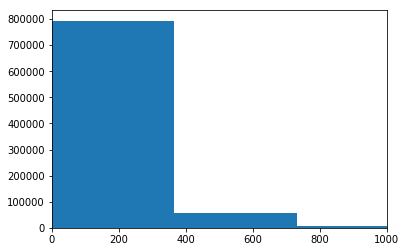

In [293]:
fig, ax = plt.subplots()

ax.set_xlim(0,1000)
# Set limits
#ax.set_xlim(1, 15)
#ax.set_ylim(0, 100)


ax.hist(sales_data['PricePerSqFt'], bins = 100)

In [284]:
print(sales_data['PricePerSqFt'].max())

36585.365853658535


Maybe take the log because of the skew?

In [297]:
import math

sales_data['PricePerSqFt'].map(math.log).head()
ax.hist(sales_data['PricePerSqFt'].map(math.log), bins = 1000)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+0

Meh, leave for now.

### 4. Subset the data to 2019 sales only.

We can assume that the DocumentDate is approximately the sale date.

Create a column with properly formatted date.

In [298]:
sales_data.columns

Index(['Major', 'Minor', 'DocumentDate', 'SalePrice', 'SqFtTotLiving',
       'ZipCode', 'PricePerSqFt'],
      dtype='object')

In [299]:
#Look at the dates.
sales_data['DocumentDate'].value_counts()

11/19/2003    446
12/14/2001    368
12/01/2005    355
10/07/2004    353
06/10/2004    299
11/10/2004    286
06/24/2004    278
07/25/2001    276
05/24/2004    275
02/19/2004    268
01/04/2005    267
06/28/2004    267
06/20/2005    265
05/25/2004    260
06/23/2004    255
04/27/2004    254
06/21/2004    254
10/07/2002    252
07/25/2005    251
08/26/2003    250
08/25/1999    249
06/23/2003    247
06/24/1998    246
06/18/2003    246
12/16/2002    244
05/25/1999    244
04/26/2004    242
04/26/1994    241
05/26/2004    240
05/24/2005    239
             ... 
08/13/1988      1
05/08/2011      1
06/04/1964      1
09/08/1990      1
07/14/1990      1
11/01/1975      1
09/17/1988      1
04/09/1988      1
02/07/2016      1
08/11/2002      1
01/22/2017      1
05/21/1989      1
06/25/1983      1
11/22/2008      1
02/01/1980      1
06/21/1987      1
05/07/1988      1
10/16/1981      1
01/30/1993      1
02/25/1989      1
09/05/1994      1
11/30/1981      1
12/30/1977      1
12/30/2007      1
02/17/1991

Seems Ok? Let's try converting to date.

In [300]:
sales_data['DocumentDateUse'] = pd.to_datetime(sales_data['DocumentDate'])

In [301]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866862 entries, 0 to 1437520
Data columns (total 8 columns):
Major              866862 non-null float64
Minor              866862 non-null float64
DocumentDate       866862 non-null object
SalePrice          866862 non-null int64
SqFtTotLiving      866862 non-null int64
ZipCode            866862 non-null object
PricePerSqFt       866862 non-null float64
DocumentDateUse    866862 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 59.5+ MB


In [303]:
# OK, now subset by year = 2019
sales_data_2019 = sales_data[ sales_data['DocumentDateUse'].dt.year == 2019 ]

In [304]:
sales_data_2019.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode,PricePerSqFt,DocumentDateUse
605,214090.0,110.0,03/06/2019,390000,1780,98042,219.101124,2019-03-06
651,367890.0,30.0,03/13/2019,923000,2550,98144,361.960784,2019-03-13
868,350160.0,125.0,02/06/2019,935000,2460,98117,380.081301,2019-02-06
1063,882790.0,870.0,02/15/2019,890000,2380,98105,373.949580,2019-02-15
1341,30200.0,645.0,03/04/2019,380000,1750,98001,217.142857,2019-03-04


In [305]:
sales_data_2019.tail(10)

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode,PricePerSqFt,DocumentDateUse
1432030,277660.0,116.0,03/18/2019,740000,1510,98117,490.066225,2019-03-18
1432844,357480.0,970.0,02/22/2019,595000,2300,98034,258.695652,2019-02-22
1433315,92304.0,9521.0,01/17/2019,562500,2450,98168,229.591837,2019-01-17
1433918,887900.0,39.0,01/14/2019,301000,1270,98032,237.007874,2019-01-14
1434391,100.0,67.0,03/18/2019,358308,2240,98002,159.958929,2019-03-18
1434593,138730.0,80.0,01/18/2019,510000,1390,98011,366.906475,2019-01-18
1435029,712930.0,4285.0,02/08/2019,475000,2360,98118,201.271186,2019-02-08
1435864,541410.0,122.0,02/14/2019,485000,1050,98118,461.904762,2019-02-14
1435989,162040.0,180.0,02/07/2019,1099000,2660,98034,413.157895,2019-02-07
1437220,637300.0,167.0,01/25/2019,695000,1780,98116,390.449438,2019-01-25


Seems to have converted OK.

### 5. Subset the data to zip codes within the City of Seattle.

You'll need to find a list of Seattle zip codes!

Alex found a list of zip codes! will use below.

In [330]:
seattle_zips = pd.read_csv('Zip_Codes.csv')
#seattle_zips.head()
seattle_zips['ZIP'] = seattle_zips['ZIP'].apply(str)

In [331]:
seattle_zips = pd.DataFrame(seattle_zips['ZIP'].unique(),columns=['zip'])

In [326]:
seattle_zips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 1 columns):
zip    196 non-null object
dtypes: object(1)
memory usage: 1.6+ KB


Visually comparing to the other sources, it seems that that this is way more zips than would expect? For example, the list Anna Slacked was ~30ish. I think *this* list might be all potential Seattle Zips, as in present and future?

For simplicity I will just use the Anna's list =D.  Although, theoretically, it shouldn't matter? 

In [350]:
seattle_zips = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98146, 98154, 98164, 98174, 98177, 98178, 98195, 98199]

#Convert to df, because I want to use merge. Because.
seattle_zips = pd.DataFrame(seattle_zips,columns=['zip'])
seattle_zips['zip'] = seattle_zips['zip'].apply(str)
seattle_zips.head()

,zip
0,98101
1,98102
2,98103
3,98104
4,98105


In [344]:
seattle_zips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 1 columns):
zip    31 non-null object
dtypes: object(1)
memory usage: 328.0+ bytes


In [339]:
type(sales_data['ZipCode'])
type(seattle_zips['zip'])

pandas.core.series.Series

Join it up!

In [345]:
sales_data_seattle = pd.merge( sales_data, seattle_zips
                             ,how = 'inner'
                             ,left_on = 'ZipCode'
                             ,right_on = 'zip')

In [346]:
sales_data_seattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277854 entries, 0 to 277853
Data columns (total 9 columns):
Major              277854 non-null float64
Minor              277854 non-null float64
DocumentDate       277854 non-null object
SalePrice          277854 non-null int64
SqFtTotLiving      277854 non-null int64
ZipCode            277854 non-null object
PricePerSqFt       277854 non-null float64
DocumentDateUse    277854 non-null datetime64[ns]
zip                277854 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 21.2+ MB


In [347]:
sales_data_seattle.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode,PricePerSqFt,DocumentDateUse,zip
0,284150.0,10.0,04/06/1983,91500,2860,98108,31.993007,1983-04-06,98108
1,284150.0,10.0,09/24/2014,390000,2860,98108,136.363636,2014-09-24,98108
2,788360.0,3551.0,03/25/1988,60000,1230,98108,48.780488,1988-03-25,98108
3,788360.0,3551.0,02/26/2017,250000,1230,98108,203.252033,2017-02-26,98108
4,170840.0,880.0,12/03/2018,300000,890,98108,337.078652,2018-12-03,98108


### 6. What is the mean price per square foot for a house sold in Seattle in 2019?

Don't just type the answer. Type code that generates the answer as output!

In [349]:
sales_data_seattle['SalePrice'].sum() / sales_data_seattle['SqFtTotLiving'].sum()

201.46194232008676